In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
# In addition, we’ll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Note
#You can only unzip a zipped tuple once before it is removed from the computer’s memory.
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [5]:
pip install citipy

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [8]:
#Note
#The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
weather_api_key

'4f14d4e563335a9624b52bc87be69cca'

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f14d4e563335a9624b52bc87be69cca


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
        
        # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    # Create endpoint URL with each city.
city_url = url + "&q=" + "i"

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san jose de sisa
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | terra rica
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | broome
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | vyartsilya
Processing Record 16 of Set 1 | te anau
Processing Record 17 of Set 1 | bang saphan
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 22 of Set 1 | ch

Processing Record 42 of Set 4 | taburi
City not found. Skipping...
Processing Record 43 of Set 4 | faya
Processing Record 44 of Set 4 | hihifo
City not found. Skipping...
Processing Record 45 of Set 4 | lakhdenpokhya
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | bintulu
Processing Record 48 of Set 4 | pekalongan
Processing Record 49 of Set 4 | burica
City not found. Skipping...
Processing Record 50 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | havre-saint-pierre
Processing Record 3 of Set 5 | benjamin hill
Processing Record 4 of Set 5 | cachoeiras de macacu
Processing Record 5 of Set 5 | banmo
City not found. Skipping...
Processing Record 6 of Set 5 | teya
Processing Record 7 of Set 5 | zhezkazgan
Processing Record 8 of Set 5 | abalak
Processing Record 9 of Set 5 | saint-raymond
Processing Record 10 of Set 5 | rawson
Processing Record 11 of Set 5 | bredy
Processing Record 12 of

Processing Record 32 of Set 8 | norman wells
Processing Record 33 of Set 8 | gvarv
Processing Record 34 of Set 8 | yulara
Processing Record 35 of Set 8 | mizdah
Processing Record 36 of Set 8 | thanh hoa
Processing Record 37 of Set 8 | benicarlo
Processing Record 38 of Set 8 | ornskoldsvik
Processing Record 39 of Set 8 | nova olimpia
Processing Record 40 of Set 8 | indian head
Processing Record 41 of Set 8 | riyadh
Processing Record 42 of Set 8 | indaial
Processing Record 43 of Set 8 | nong chik
Processing Record 44 of Set 8 | vostok
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | ubinskoye
Processing Record 48 of Set 8 | nanpiao
Processing Record 49 of Set 8 | portland
Processing Record 50 of Set 8 | port blair
Processing Record 1 of Set 9 | tura
Processing Record 2 of Set 9 | namatanai
Processing Record 3 of Set 9 | sinkat
City not found. Skipping...
Processing Record 4 of Set 9 | honiara
Processing Record 5 of Set 9 

Processing Record 23 of Set 12 | ostrovnoy
Processing Record 24 of Set 12 | puerto quijarro
Processing Record 25 of Set 12 | sept-iles
Processing Record 26 of Set 12 | porto empedocle
Processing Record 27 of Set 12 | lata
Processing Record 28 of Set 12 | dingle
Processing Record 29 of Set 12 | shirokiy
Processing Record 30 of Set 12 | kavieng
Processing Record 31 of Set 12 | ixtapa
Processing Record 32 of Set 12 | wuwei
Processing Record 33 of Set 12 | ames
Processing Record 34 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 35 of Set 12 | elbistan
Processing Record 36 of Set 12 | kurilsk
Processing Record 37 of Set 12 | sataua
City not found. Skipping...
Processing Record 38 of Set 12 | xinqing
Processing Record 39 of Set 12 | beringovskiy
Processing Record 40 of Set 12 | panguna
Processing Record 41 of Set 12 | kuche
City not found. Skipping...
Processing Record 42 of Set 12 | arman
Processing Record 43 of Set 12 | vastse-kuuste
Processing Record 44 of Set 12 | 

In [13]:
len(city_data)

563

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Jose De Sisa,-6.62,-76.69,62.60,100,40,3.36,PE,2020-04-04 19:42:23
1,Victoria,22.29,114.16,66.99,93,40,11.41,HK,2020-04-04 19:41:10
2,Rikitea,-23.12,-134.97,76.37,79,91,14.74,PF,2020-04-04 19:42:23
3,Terra Rica,-22.71,-52.62,72.99,50,3,3.56,BR,2020-04-04 19:42:23
4,Busselton,-33.65,115.33,63.00,34,100,13.29,AU,2020-04-04 19:42:23
5,Coquimbo,-29.95,-71.34,62.60,77,75,10.29,CL,2020-04-04 19:42:23
6,Avarua,-21.21,-159.78,78.80,94,90,14.99,CK,2020-04-04 19:39:30
7,Port Alfred,-33.59,26.89,72.00,78,0,4.00,ZA,2020-04-04 19:42:23
8,Husavik,66.04,-17.34,19.40,85,90,38.03,IS,2020-04-04 19:42:23
9,Upernavik,72.79,-56.15,13.19,80,4,7.76,GL,2020-04-04 19:42:24


In [16]:
new_column_order = ['City', 'Country','Date','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Jose De Sisa,PE,2020-04-04 19:42:23,-6.62,-76.69,62.60,100,40,3.36
1,Victoria,HK,2020-04-04 19:41:10,22.29,114.16,66.99,93,40,11.41
2,Rikitea,PF,2020-04-04 19:42:23,-23.12,-134.97,76.37,79,91,14.74
3,Terra Rica,BR,2020-04-04 19:42:23,-22.71,-52.62,72.99,50,3,3.56
4,Busselton,AU,2020-04-04 19:42:23,-33.65,115.33,63.00,34,100,13.29
...,...,...,...,...,...,...,...,...,...
558,Shitanjing,CN,2020-04-04 19:43:16,39.23,106.34,44.31,27,84,1.66
559,Olafsvik,IS,2020-04-04 19:43:16,64.89,-23.71,25.20,93,100,49.57
560,Saint-Pierre,RE,2020-04-04 19:43:16,-21.34,55.48,77.00,78,20,11.41
561,Amahai,ID,2020-04-04 19:43:16,-3.33,128.92,79.48,78,100,4.56


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1586033228.304401

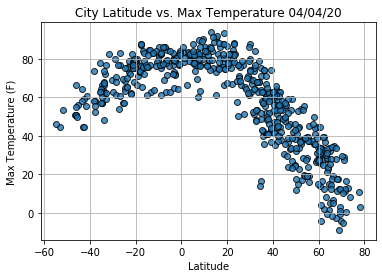

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

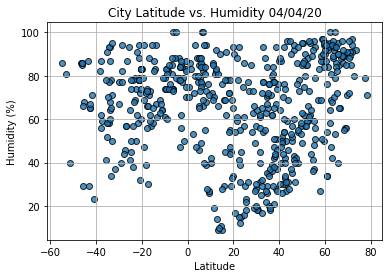

In [25]:
# Build the scatter plots for latitude vs. humidity.             --------------------6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()